# Machine Learning Comparison


## Objective 

In this project we will train several algorithm at once and use metric to compare the serults and select the best model. The selected model will be used on the test dataset. The chosen algorithms are : Random Forest, 
Decision Trees,Bagging,Boosting and SVM. 


The **Datasets** is based on a real credit risk data, and is to predict not-credible and credible credit card clients. Variable Y which represents a credit card default payment (Yes = 1, No = 0), using the 23 predictor variables. Two datasets are provided : the training dataset in the creditdefault_train.csv file, and a test dataset in the creditdefult_test.csv file. Each dataset contains 15000 rows and  23 columns.

## Algorithms

***KNN*** - It finds sample data that is closest in distance to the target object.**Advantages** are :Zero cost in the learning process,Classifying any data whenever finding similarity measures of any given instances,Intuitive approach,Robust outliers on the prediction.**Disadvantages** are: Expensive computation for a large dataset, Hard to interpret the result, Very difficult on handling data mixed types, Choosing the wrong distance measure can produce inaccurate results.



***Random Forest*** - With random forest, you can split the data, give it to multiple decision trees, combine multiple trees to a forest and use a majority vote to find the best possible decision. Random forest is a type of ensemble which is a combination of gathering decisions(outcomes) from different algorithms. A large number of decision trees are created to form a random forecast. Each decision tree forecasts a value and the average of the forecasted values are chosen.**Advantages** are: High accuracy,Good starting point to solve a problem,Flexible and can fit a variety of different data well,Fast to execute ,Useful for regression and classification problems.**Disadvantages** are: Slow at training overfitting,Not suitable for small samples,Small change in training data changes model,Occasionally too simple for very complex problems.


***Decision Trees*** - A graph that uses a branching method to match all possible outcomes of a decision.**Advantages** are: Computational complexity is not high,Output is easy to understand and to interpret,Can handle numerical and categorical data.**Disadvantages** are :Can be unstable because small variations in the data might lead to different results, May generate biased tree if some classes are dominant.


***Bagging*** - bagging stands for bootstrap aggregation. Bagging is a techinque for learning many classifiers by only using a portion of the data and then combining them through a model averaging techinique. The idead behind this is to reduce overffting of of a class model.**Advantages** are: Reduces variances which help to avoid overfitting problems.**Disadvantages** are: Loss of interpretability, computational complexity, Requires careful turning of different hyper-parameters.


***Gradiant Boosting*** - boosting is an esemble technique in which learners are learned sequentialy. Early learners fitting simple models to the data and then analyse the data fro errors. Those erroes identifies problems or a particular instances of the data that are difficult or hard to fit examples.**Advantages** are: Hig performance, Can solve almost all the objective function that we can write gradient out, Has an excellent predictive accuracy.**Disadvantages** are : Sensitivity to overfitting if the data is noisy, Training takes longer since trees are built sequentially.



***SVM*** - Maps the inputs space to a high dimensional space that is proportional to the training sample size. Makes predictions by continuous interpolation.**Advantages** are: Suitable when the sample size is smaller than the number of dimensions.**Disadvantages** are: Not usually employed for continuous numerical variables, mostly for categorical variables, Complex calculation when there are many class labels, sensitive to outliers.


## Metrics


**Accuracy** : The overall effectiveness of the classifier.

Accuracy = $\frac{True positives + True Negatives}{Total Observation}$

**Recall** : Effectiveness of a classifier to identify class labels if calculated from sums of per-text decisions.

Recall = $\frac{True positives}{True positives + False Negatives}$


**Precision** : Agreement of the data class labels with those of the classifier if calculated from sums of per text decisions.

Precision = $\frac{True positives }{True positives + False positives}$


**F1 score** : Relations between data's positive labels and those given by classifier based on sums of per-text decisions.

Fscore = $\frac{2 * precision * recall}{recision + recall}$

* **resource :** [https://www.researchgate.net/figure/Classification-performance-metrics-based-on-the-confusion-matrix_tbl4_325567208]



## Table of Contents
   * [1. Load the library and data](#chapter1)
   * [2. Performance Algorithm Comparison](#chapter1)
   * [3. Test Set Prediction ](#chapter1)
   *  [Evaluation](#chapter1)




# 1. Load the library and data

In this section the library and the data used are loaded into the sytem

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 1.1 Load the library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### 1.2 Load the data

In [3]:
train = pd.read_csv("/Users/goundosidibe/Downloads/creditdefault_train.csv")
test= pd.read_csv("/Users/goundosidibe/Downloads/creditdefault_test.csv")

In [4]:
#separate target values
y_train = train['Y'].values
y_test = test['Y'].values

#create a dataframe with all training data except the target column
X_train = train.drop(columns=['Y'])
X_test = test.drop(columns=['Y'])

In [5]:
X_train.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
#examine the data
X_train.shape, y_train.shape

((15000, 23), (15000,))

In [7]:
X_test.shape, y_test.shape

((15000, 23), (15000,))

# 2. Performance Algorithm Comparison

### 2.1 List of Machine Learning Algorithm (MLA) 

In [8]:
#appened the following classifications to an empty list (models).

models = []

models.append(('knn', KNeighborsClassifier()))
models.append(('tree', DecisionTreeClassifier()))
models.append(('bagging', BaggingClassifier()))
models.append(('forest', RandomForestClassifier()))
models.append(('boosting', GradientBoostingClassifier()))
models.append(('SVM', SVC()))

### 2.2 Train the data into the model and calculate the performance

In [9]:
# import all the algorithms, then train model using 10-folds- cross validation.
results = []
names = []
crossV_results = []
for name, model in models:
    # the data set is split into 10 folds
    kfold = KFold(n_splits=10, random_state=7)
    #finds the accuracy of all 10 folds
    crossV_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(crossV_results)
    names.append(name)
    #calculates the mean and standard deviation.
    final = "%s: %.2f (%f)" % (name, crossV_results.mean(), crossV_results.std())
    print(final)

    '''
    This code imports all the algorithms (knn,tree,bagging,forest,boosting,SVM), and train the model using 10 fold 
    cross validation.We have created an empty list named 'models' and then appended to the algorithm list.
    Kfold classification is used in this model. The data is split into 10 folds. The first fold of the 
    iteration is used to test the model, and the rest are used to train the model. "Cross_val_score" 
    means the accuracy score of the cross validation(kfolds).

    '''

knn: 0.75 (0.017651)
tree: 0.72 (0.015457)
bagging: 0.81 (0.013388)
forest: 0.81 (0.012212)
boosting: 0.82 (0.012336)
SVM: 0.78 (0.018893)


'\nThis code imports all the algorithms (knn,tree,bagging,forest,boosting,SVM), and train the model using 10 fold \ncross validation.We have created an empty list named \'models\' and then appended to the algorithm list.\nKfold classification is used in this model. The data is split into 10 folds. The first fold of the \niteration is used to test the model, and the rest are used to train the model. "Cross_val_score" \nmeans the accuracy score of the cross validation(kfolds).\n\n'

### 2.3 Compare algorithms

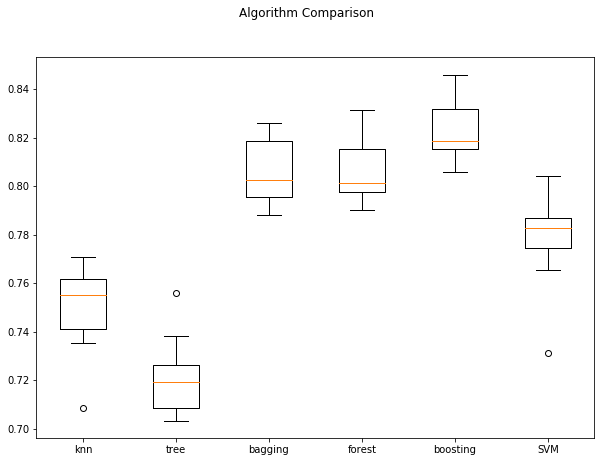

In [10]:
#plot an algorithm comparison box plot to compare the accuracy of both algorithms

fig = plt.figure(figsize =(10, 7))
plt.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 2.2 Cross Validation Accuracy

In [12]:
Kfods_results = pd.DataFrame(results)

Kfods_results.columns = ['kfold1','kfold2','kfold3','kfold4','kfold5',
                         'kfold6','kfold7','kfold8','kfold9','kfold10']

# Change the row indexes 
Kfods_results.index= ['KNeighborsClassifier', 'DecisionTreeClassifier', 'BaggingClassifier', 
                'RandomForestClassifier','GradientBoostingClassifier','SVM'] 

df_t = Kfods_results.T

In [13]:

df_t

,KNeighborsClassifier,DecisionTreeClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,SVM
kfold1,0.735333,0.706000,0.788000,0.790000,0.806000,0.773333
kfold2,0.754667,0.703333,0.800667,0.800667,0.820000,0.787333
kfold3,0.738000,0.712667,0.789333,0.802000,0.817333,0.765333
kfold4,0.750667,0.738000,0.808000,0.798667,0.816000,0.784000
kfold5,0.755333,0.715333,0.797333,0.797333,0.815333,0.777333
kfold6,0.708667,0.707333,0.794667,0.794667,0.808000,0.731333
kfold7,0.770667,0.724667,0.823333,0.818000,0.837333,0.785333
kfold8,0.763333,0.756000,0.822000,0.831333,0.846000,0.804000
kfold9,0.768667,0.726667,0.826000,0.818000,0.833333,0.796667
kfold10,0.756667,0.723333,0.804667,0.808000,0.827333,0.781333


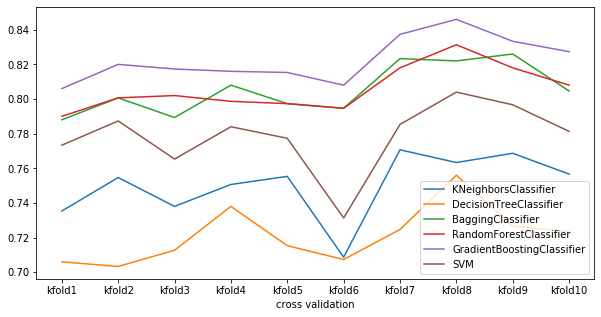

In [14]:
#visualize the result of all 10 folds graphically and look at the mean of all the scores.
plt.figure(figsize=(10, 5))
plt.plot(df_t)
plt.xlabel("cross validation")
plt.legend(df_t)
plt.show()

# 3. Test Set Prediction 

### 3.1 Compare our predictions to the ground truth

In [15]:
#make predictions on the test set.

cls = GradientBoostingClassifier()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
#compare our predictions to the ground truth
print("predicted values:", y_pred,"\n")
print("target values:", y_pred,"\n")
# show the accuracy
print('accuracy :',accuracy_score(y_test,y_pred),"\n")
#classification report 
print(classification_report(y_test,y_pred),"\n")

predicted values: [0 0 0 ... 0 1 0] 

target values: [0 0 0 ... 0 1 0] 

accuracy : 0.8192 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     11682
           1       0.67      0.36      0.47      3318

    accuracy                           0.82     15000
   macro avg       0.76      0.65      0.68     15000
weighted avg       0.80      0.82      0.80     15000
 



### 3.2 Confusion Matrix

'\nAs we can see for our 15,000 instances in testing data, we got only (583) wrong predictions, \nrest are correctly predicted.\n\n582 data points were incorrectly predicted by the GradientBoostingClassifier model (FP).\n11100 data points were correctly predicted by the model (TP).\n\n2129 data points were incorrectly predicted as 1 (FN).\n1189 data points were correctly predicted as 1 (TN).\n\n'

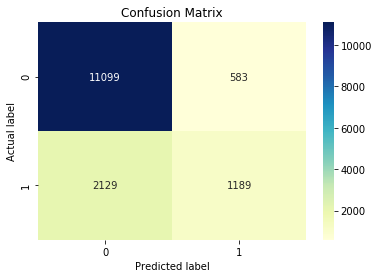

In [16]:
# confusion matrix to evaluate the accuracy of GradientBoostingClassifier prediction
matrix = confusion_matrix(y_test,y_pred)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

'''

583 data points were incorrectly predicted by the GradientBoostingClassifier model (FP).
11099 data points were correctly predicted by the model (TP).

2129 data points were incorrectly predicted as 1 (FN).
1189 data points were correctly predicted as 1 (TN).

'''

# Evaluation


### *Model*

 This project explores 5 basic machine learning algorithms. To approve and assess the execution of the classifiers, a 10-cross validation strategy is utilized.  The accuracy of each fold is computed,  and the model with high fold accuracy was selected to predict the test set. All accuracy of the dataset is presented in section 3.3. It is observed that GradientBoostingClassifier got the highest accuracy of ( 82%) in the training dataset. This is followed by BaggingClassifier() with 80% accuracy. DecisionTreeClassifier had a loss accuracy of 72% compared to the other algorithms. 
Although GradientBoostingClassifier got the highest accuracy, the other algorithms accuracy was high as well, and the accuracy differences between each model were minor. 
The selected model is GradientBoostingClassifier as it outperformed the other considered algorithms.

**Test set**

The GradientBoosting Classifier was used to predict the test set. We got results with an accuracy of  81%. The Classification_score   was used to measure the quality of GradientBoosting prediction. The precision, recall and f1-score in label 0 are very high, meaning that the model is good at predicting label 0, however is poor at classifying labels 1 as its measurement in recall ,and f1-score is very low. For confusion matric we got the following results :
* False Positive (FP) :583
* True Positive (TP): 11099
* False Negative (FN): 2129
* True Negative (TN): 1180




